In this notebook, we collect stock price data from yahoo finance, a media property that is part of Yahoo!'s network. <br> 
We utilize the yfinance api https://pypi.org/project/yahoo-finance/ by Ran Aroussi. <br>
Credits: Rohan Joseph https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f <br>
We perform feature engineering and perform a binary classification of the price change based on stock prices.

In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [2]:
# Time period for stock data
from datetime import date
start = datetime.datetime(2016,1,1)
end = date.today()

In [3]:
# Get stock ticker symbols listed on NASDAQ
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
Symbols = companies['Symbol'].tolist()

In [5]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,11 : ABCB,12 : ABCD,13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: No data found for this date range, symbol may be delisted
23 : ACAT,
1 Failed download:
- ACAT: No data found for this date range, symbol may be delisted
24 : ACET,25 : ACFC,26 : ACFN,27 : ACGL,28 : ACHC,29 : ACHN,
1 Failed download:
- ACHN: No data found, sy

In [6]:
stock_final

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,0.129814,0.129814,0.128314,0.129064,0.129064,2366619.0,AAIT
2016-01-05,0.128314,0.129064,0.127563,0.128314,0.128314,721332.0,AAIT
2016-01-06,0.127563,0.127563,0.126813,0.127563,0.127563,424647.0,AAIT
2016-01-07,0.126063,0.126063,0.119309,0.120810,0.120810,8543284.0,AAIT
2016-01-11,0.123061,0.123811,0.120060,0.120810,0.120810,1715576.0,AAIT
...,...,...,...,...,...,...,...
2021-02-18,45.610001,45.750000,44.400002,45.240002,45.240002,152700.0,ZUMZ
2021-02-19,45.330002,46.980000,44.900002,46.040001,46.040001,132100.0,ZUMZ
2021-02-22,45.849998,47.840000,45.849998,47.750000,47.750000,169800.0,ZUMZ


In [7]:
stock_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.362782e+06,2.362782e+06,2.362782e+06,2.362782e+06,2.362782e+06,2.362782e+06
mean,3.308922e+04,3.561453e+04,3.081943e+04,3.255633e+04,3.255527e+04,9.399425e+05
std,3.000376e+06,3.254486e+06,2.772842e+06,2.938052e+06,2.938052e+06,5.889826e+06
min,1.000000e-05,1.000000e-05,1.000000e-05,1.000000e-05,1.000000e-05,0.000000e+00
25%,7.840000e+00,8.000000e+00,7.650000e+00,7.830000e+00,7.522474e+00,1.790000e+04
50%,2.080000e+01,2.115000e+01,2.046000e+01,2.080000e+01,1.981687e+01,1.146000e+05
75%,4.453000e+01,4.515000e+01,4.390000e+01,4.452000e+01,4.283217e+01,4.809000e+05
max,6.930000e+08,7.560000e+08,5.544000e+08,5.949000e+08,5.949000e+08,9.911062e+08


In [8]:
#check missing data
stock_final.isna().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
Name         0
dtype: int64

In [9]:
# number of companies with stock data
stock_final['Name'].nunique()

1934

In [10]:
# get Alphabet stock from all the companies' data
Alphabet_stock = stock_final[stock_final['Name'] == 'GOOGL']
Alphabet_stock

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100.0,GOOGL
2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800.0,GOOGL
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300.0,GOOGL
2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600.0,GOOGL
2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300.0,GOOGL
...,...,...,...,...,...,...,...
2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300.0,GOOGL
2021-02-19,2107.790039,2118.580078,2083.429932,2088.810059,2088.810059,1866100.0,GOOGL
2021-02-22,2053.600098,2080.330078,2048.000000,2054.260010,2054.260010,1469500.0,GOOGL


Text(0, 0.5, 'Close prices for GOOGL')

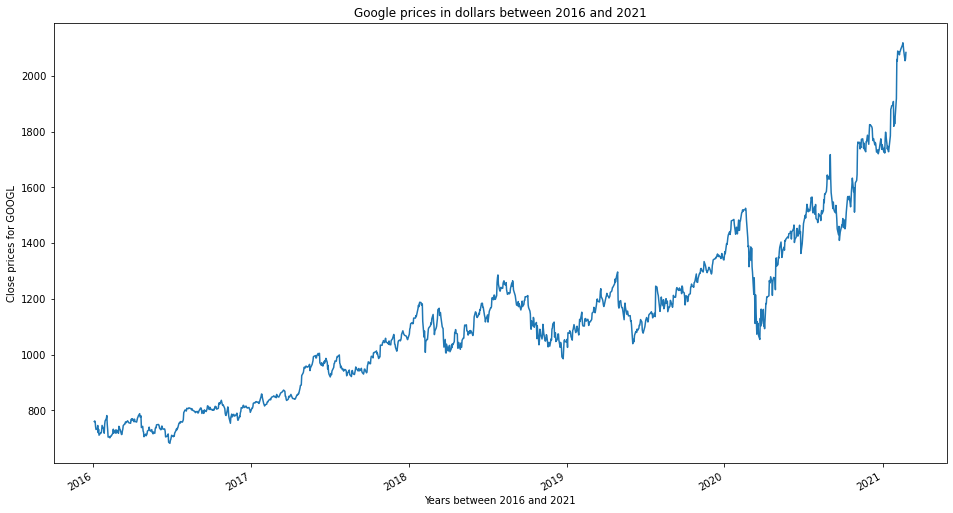

In [11]:
#Plot alphanbet stock since 2016
import matplotlib.pyplot as plt
import seaborn
ax = Alphabet_stock['Adj Close'].plot(figsize=(16, 9), title='Google prices in dollars between 2016 and 2021')
ax.set_xlabel("Years between 2016 and 2021")
ax.set_ylabel("Close prices for GOOGL")

Define a certain window: month, year etc <br>
More like a fourier window: one year, one month? different window sizes. <br>
Inside the window, derive several descriptors to use ML for predicition <br>
Feature engineering <br>
Given maximum price, min price (two descriptors), derive the ratio, average price, standard deviation of the price, <br>
all time high price, time past since price peaked <br>
Skewness of the price. <br>
Plot histogram of the price, say with 10 bins of the fourier transform of the prices. <br>
Check how important the entropy is<br>
Linear regression coefficient of the price and the date <br>
Pearson coefficient between price and date <br>
Take care of delisted companies on the url list of NASDAQ companies

# Price analysis for Alphabet stock

We plot the moving averages for prices for 50, 100, and 200 days. <br>
We plot the average, minimum, and maximum prices for Alphabet stock between 2016 and 2021. <br>
We also derive the highest price per year and all time high price.

<ipython-input-12-f1a498632aa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alphabet_stock['MA50'] = Alphabet_stock['Close'].rolling(50).mean()
<ipython-input-12-f1a498632aa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alphabet_stock['MA100'] = Alphabet_stock['Close'].rolling(100).mean()
<ipython-input-12-f1a498632aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

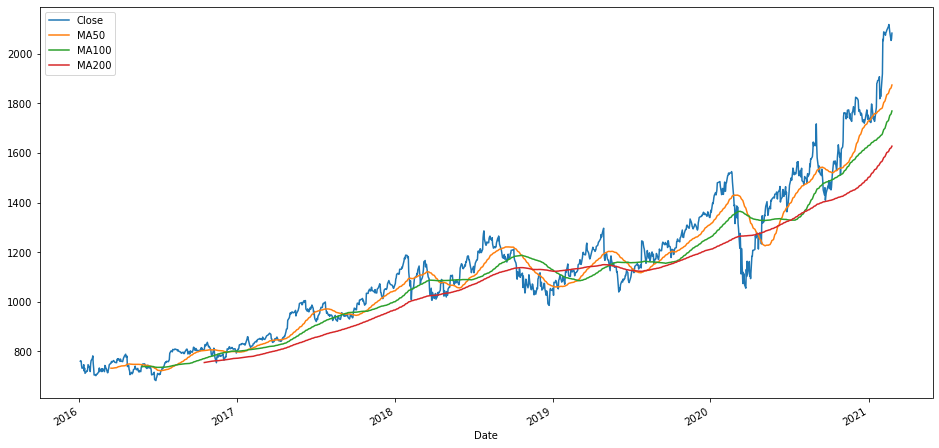

In [12]:
# moving average for 50, 100, and 200 days
Alphabet_stock['MA50'] = Alphabet_stock['Close'].rolling(50).mean()
Alphabet_stock['MA100'] = Alphabet_stock['Close'].rolling(100).mean()
Alphabet_stock['MA200'] = Alphabet_stock['Close'].rolling(200).mean()
Alphabet_stock[['Close', 'MA50', 'MA100', 'MA200']].plot(label = 'DAL', figsize = (16, 8)); 

In [13]:
Alphabet_stock.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Name          object
MA50         float64
MA100        float64
MA200        float64
dtype: object

In [14]:
# The index column is currently the datetime which we need to analyze the stock.
# We convert the current index column to a normal column
Alphabet_stock.reset_index(inplace=True)

In [15]:
Alphabet_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Name,MA50,MA100,MA200
0,2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100.0,GOOGL,NaN,NaN,NaN
1,2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800.0,GOOGL,NaN,NaN,NaN
2,2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300.0,GOOGL,NaN,NaN,NaN
3,2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600.0,GOOGL,NaN,NaN,NaN
4,2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300.0,GOOGL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1290,2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300.0,GOOGL,1852.125195,1744.915896,1613.342650
1291,2021-02-19,2107.790039,2118.580078,2083.429932,2088.810059,2088.810059,1866100.0,GOOGL,1857.560796,1751.413396,1617.041600
1292,2021-02-22,2053.600098,2080.330078,2048.000000,2054.260010,2054.260010,1469500.0,GOOGL,1862.419397,1757.369396,1620.585750
1293,2021-02-23,2013.989990,2072.500000,1990.229980,2060.120117,2060.120117,1732200.0,GOOGL,1868.064600,1763.310397,1624.039951


In [16]:
# convert date from float to datetime type
Alphabet_stock['Date'] =  pd.to_datetime(Alphabet_stock['Date'], format='%d%b%Y:%H:%M:%S.%f')

<ipython-input-16-61b6ad63ba0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alphabet_stock['Date'] =  pd.to_datetime(Alphabet_stock['Date'], format='%d%b%Y:%H:%M:%S.%f')


Text(0.5, 0, 'Stock prices for GOOGL between between 2016 and 2021')

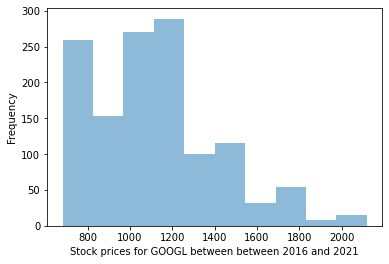

In [17]:
# plot the price of the stock of GOOGL on a histogram with 10 bins
ax = Alphabet_stock['Close'].plot.hist(bins=10, alpha=0.5)
ax.set_xlabel("Stock prices for GOOGL between between 2016 and 2021")

Text(0, 0.5, 'Average Close prices')

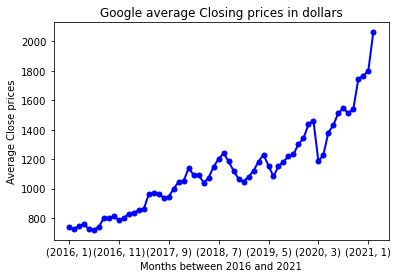

In [18]:
#return the average prices for each month for 'GOOGL'
Alphabet_stock_av = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).mean()

ax = Alphabet_stock_av.plot(lw=2, colormap='brg', marker='.', markersize=10, title='Google average Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Average Close prices")

In [19]:
Alphabet_stock_av

Date  Date
2016  1        736.656844
      2        724.389996
      3        746.787270
      4        756.608570
      5        726.529524
                 ...     
2020  10      1541.920898
      11      1743.390002
      12      1767.710904
2021  1       1800.195788
      2       2062.695887
Name: Close, Length: 62, dtype: float64

Text(0, 0.5, 'Minimum Close prices')

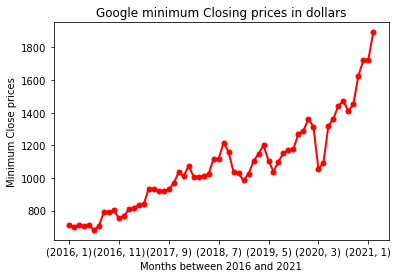

In [20]:
#return the minimum prices for each month for 'GOOGL'
Alphabet_stock_min = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).min()

ax = Alphabet_stock_min.plot(lw=2, colormap='flag', marker='.', markersize=10, title='Google minimum Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Minimum Close prices")

Text(0, 0.5, 'Maximum Close prices')

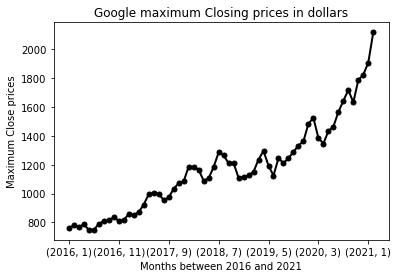

In [21]:
#return the maximum prices for each month for 'GOOGL'
Alphabet_stock_max = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year, Alphabet_stock.Date.dt.month]).max()

ax = Alphabet_stock_max.plot(lw=2, colormap='nipy_spectral', marker='.', markersize=10, title='Google maximum Closing prices in dollars')
ax.set_xlabel("Months between 2016 and 2021")
ax.set_ylabel("Maximum Close prices")

In [22]:
# highest price by year for 'GOOGL'
Alphabet_stock_year_max = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year]).max()
Alphabet_stock_year_max

Date
2016     835.739990
2017    1085.089966
2018    1285.500000
2019    1362.469971
2020    1824.969971
2021    2118.620117
Name: Close, dtype: float64

In [23]:
# all-time high price for 'GOOGL'
max(Alphabet_stock_year_max)

2118.6201171875

In [24]:
# highest price by year for 'GOOGL'
Alphabet_stock_year_min = Alphabet_stock['Close'].groupby([Alphabet_stock.Date.dt.year]).min()
Alphabet_stock_year_min

Date
2016     681.140015
2017     807.770020
2018     984.669983
2019    1025.469971
2020    1054.130005
2021    1722.880005
Name: Close, dtype: float64

In [25]:
min(Alphabet_stock_year_min)

681.1400146484375

In [26]:
# time past since price peaked
Alphabet_stock[Alphabet_stock['Close'] == max(Alphabet_stock_year_max)]['Date']

1289   2021-02-17
Name: Date, dtype: datetime64[ns]

# Pearson coefficient between price and date for Alphabet stock

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. <br> https://www.socscistatistics.com/tests/pearson/

In [27]:
stock_final['Adj Close'].corr(stock_final['Close'])

0.9999999999995093

In [28]:
Alphabet_stock['Adj Close'].corr(Alphabet_stock['Close'])

0.9999999999999998

In [29]:
Alphabet_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name',
       'MA50', 'MA100', 'MA200'],
      dtype='object')

In [30]:
Alphabet_stock['Open'].corr(Alphabet_stock['Close'])

0.9986344306448723

In [31]:
Alphabet_stock['Low'].corr(Alphabet_stock['Close'])

0.9993754327731064

In [32]:
Alphabet_stock['High'].corr(Alphabet_stock['Close'])

0.9993072383174654

In [33]:
Alphabet_stock_max.corr(Alphabet_stock_min)

0.9841051455013514

To do: <br>
Explore moving averages <br>
Study fourier windows/window sizes <br>
Leverage Sam to come up with a more structured goal for a project

per six month high, per six month low <br>
take the magnitudes and plot a histogram of the fourier transform <br>
monotonic rate of the stock: how many times the stocks rises in two consecutive days compared to up and down <br>
Does it go up sharply and drop? <br>

Take a window, say one day, compute features where each row is the end of the day and columns are the <br>
features computed from that window. Derive a target variable, in this case the change in the price. The last column is the ground truth, the ground truth is the price P[x+7]/P[x], where x is the date of the END of the window <br>
window1: 1/1/2015 - 2/1/2015 <br>
window2: 1/2/2015 - 2/2/2015 <br>
window3: 1/3/2015-2/3/2015 <br>
Target variable: P[2/7/2015]/P[2/1/2015]

In [34]:
start_date_filter = Alphabet_stock[Alphabet_stock['Date'].map(lambda x: x.day) == 1]

In [35]:
#filter window dates for lower Close prices
start_date_filter

,Date,Open,High,Low,Close,Adj Close,Volume,Name,MA50,MA100,MA200
19,2016-02-01,771.260010,777.590027,761.380005,770.770020,770.770020,5576100.0,GOOGL,NaN,NaN,NaN
39,2016-03-01,721.299988,742.330017,718.640015,742.169983,742.169983,3005600.0,GOOGL,NaN,NaN,NaN
61,2016-04-01,757.159973,770.039978,755.200012,769.669983,769.669983,1583700.0,GOOGL,737.071196,NaN,NaN
103,2016-06-01,748.469971,751.369995,744.340027,748.460022,748.460022,1039400.0,GOOGL,744.344402,737.866599,NaN
125,2016-07-01,705.099976,712.530029,703.729980,710.250000,710.250000,1549200.0,GOOGL,722.759803,734.641099,NaN
145,2016-08-01,786.669983,807.489990,785.039978,800.940002,800.940002,3029700.0,GOOGL,731.935004,739.333002,NaN
168,2016-09-01,791.979980,792.890015,786.330017,791.400024,791.400024,1303500.0,GOOGL,763.777802,748.915901,NaN
210,2016-11-01,810.869995,813.960022,798.260010,805.479980,805.479980,2355900.0,GOOGL,805.565400,778.747601,758.657450
231,2016-12-01,778.549988,778.599976,753.359985,764.330017,764.330017,2867100.0,GOOGL,799.825597,793.817198,764.286099
272,2017-02-01,824.000000,824.000000,812.250000,815.239990,815.239990,2251000.0,GOOGL,809.789004,806.261701,778.092502


There are 40 instances instead of the expected 62 which is the number of 1st of the months between January 2016 and February 2021.

In [36]:
len(start_date_filter)

40

In [37]:
#filter window dates for higher close price (7th day of the month)
close_price_filter = Alphabet_stock[Alphabet_stock['Date'].map(lambda x: x.day) == 7]['Close'].reset_index()
close_price_filter1 = Alphabet_stock[Alphabet_stock['Date'].map(lambda x: x.day) == 7]['Date'].reset_index()

In [38]:
len(close_price_filter)

43

In [39]:
#merge two dataframes to a single dataframe showing close price for 7th day of the month
close_price_filter = pd.merge(left = close_price_filter, right = close_price_filter1, on = ['index'])

In [40]:
close_price_filter

,index,Close,Date
0,3,741.000000,2016-01-07
1,43,712.799988,2016-03-07
2,65,760.119995,2016-04-07
3,107,731.090027,2016-06-07
4,128,707.260010,2016-07-07
5,171,807.989990,2016-09-07
6,193,800.710022,2016-10-07
7,214,802.030029,2016-11-07
8,235,791.469971,2016-12-07
9,276,829.229980,2017-02-07


In [41]:
start_date_filter['month_year'] = pd.to_datetime(start_date_filter['Date']).dt.to_period('M')
close_price_filter['month_year'] = pd.to_datetime(close_price_filter['Date']).dt.to_period('M')

<ipython-input-41-c3d00eb3f745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_date_filter['month_year'] = pd.to_datetime(start_date_filter['Date']).dt.to_period('M')


In [42]:
close_price_filter

,index,Close,Date,month_year
0,3,741.000000,2016-01-07,2016-01
1,43,712.799988,2016-03-07,2016-03
2,65,760.119995,2016-04-07,2016-04
3,107,731.090027,2016-06-07,2016-06
4,128,707.260010,2016-07-07,2016-07
5,171,807.989990,2016-09-07,2016-09
6,193,800.710022,2016-10-07,2016-10
7,214,802.030029,2016-11-07,2016-11
8,235,791.469971,2016-12-07,2016-12
9,276,829.229980,2017-02-07,2017-02


In [43]:
close_price_filter.rename(columns={'Close': 'High_Close'}, inplace=True)

In [44]:
close_price_filter

,index,High_Close,Date,month_year
0,3,741.000000,2016-01-07,2016-01
1,43,712.799988,2016-03-07,2016-03
2,65,760.119995,2016-04-07,2016-04
3,107,731.090027,2016-06-07,2016-06
4,128,707.260010,2016-07-07,2016-07
5,171,807.989990,2016-09-07,2016-09
6,193,800.710022,2016-10-07,2016-10
7,214,802.030029,2016-11-07,2016-11
8,235,791.469971,2016-12-07,2016-12
9,276,829.229980,2017-02-07,2017-02


In [45]:
filter_df = pd.merge(left = close_price_filter, right = start_date_filter, on = ['month_year'])

In [46]:
filter_df

,index,High_Close,Date_x,month_year,Date_y,Open,High,Low,Close,Adj Close,Volume,Name,MA50,MA100,MA200
0,43,712.799988,2016-03-07,2016-03,2016-03-01,721.299988,742.330017,718.640015,742.169983,742.169983,3005600.0,GOOGL,NaN,NaN,NaN
1,65,760.119995,2016-04-07,2016-04,2016-04-01,757.159973,770.039978,755.200012,769.669983,769.669983,1583700.0,GOOGL,737.071196,NaN,NaN
2,107,731.090027,2016-06-07,2016-06,2016-06-01,748.469971,751.369995,744.340027,748.460022,748.460022,1039400.0,GOOGL,744.344402,737.866599,NaN
3,128,707.260010,2016-07-07,2016-07,2016-07-01,705.099976,712.530029,703.729980,710.250000,710.250000,1549200.0,GOOGL,722.759803,734.641099,NaN
4,171,807.989990,2016-09-07,2016-09,2016-09-01,791.979980,792.890015,786.330017,791.400024,791.400024,1303500.0,GOOGL,763.777802,748.915901,NaN
5,214,802.030029,2016-11-07,2016-11,2016-11-01,810.869995,813.960022,798.260010,805.479980,805.479980,2355900.0,GOOGL,805.565400,778.747601,758.657450
6,235,791.469971,2016-12-07,2016-12,2016-12-01,778.549988,778.599976,753.359985,764.330017,764.330017,2867100.0,GOOGL,799.825597,793.817198,764.286099
7,276,829.229980,2017-02-07,2017-02,2017-02-01,824.000000,824.000000,812.250000,815.239990,815.239990,2251000.0,GOOGL,809.789004,806.261701,778.092502
8,295,851.150024,2017-03-07,2017-03,2017-03-01,851.380005,858.000000,849.020020,856.750000,856.750000,1818700.0,GOOGL,828.742604,813.346901,788.306801
9,359,1001.500000,2017-06-07,2017-06,2017-06-01,990.960022,993.140015,981.289978,988.289978,988.289978,1306400.0,GOOGL,905.235002,873.973602,837.113451


In [47]:
price_change_df = filter_df[['month_year', 'Date_x', 'Date_y', 'Close', 'High_Close']]

In [48]:
price_change_df

,month_year,Date_x,Date_y,Close,High_Close
0,2016-03,2016-03-07,2016-03-01,742.169983,712.799988
1,2016-04,2016-04-07,2016-04-01,769.669983,760.119995
2,2016-06,2016-06-07,2016-06-01,748.460022,731.090027
3,2016-07,2016-07-07,2016-07-01,710.250000,707.260010
4,2016-09,2016-09-07,2016-09-01,791.400024,807.989990
5,2016-11,2016-11-07,2016-11-01,805.479980,802.030029
6,2016-12,2016-12-07,2016-12-01,764.330017,791.469971
7,2017-02,2017-02-07,2017-02-01,815.239990,829.229980
8,2017-03,2017-03-07,2017-03-01,856.750000,851.150024
9,2017-06,2017-06-07,2017-06-01,988.289978,1001.500000


In [49]:
price_change_df['Price Change'] = price_change_df['High_Close'] / price_change_df['Close']

<ipython-input-49-ec85c938d7e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change_df['Price Change'] = price_change_df['High_Close'] / price_change_df['Close']


In [50]:
price_change_df

,month_year,Date_x,Date_y,Close,High_Close,Price Change
0,2016-03,2016-03-07,2016-03-01,742.169983,712.799988,0.960427
1,2016-04,2016-04-07,2016-04-01,769.669983,760.119995,0.987592
2,2016-06,2016-06-07,2016-06-01,748.460022,731.090027,0.976792
3,2016-07,2016-07-07,2016-07-01,710.250000,707.260010,0.995790
4,2016-09,2016-09-07,2016-09-01,791.400024,807.989990,1.020963
5,2016-11,2016-11-07,2016-11-01,805.479980,802.030029,0.995717
6,2016-12,2016-12-07,2016-12-01,764.330017,791.469971,1.035508
7,2017-02,2017-02-07,2017-02-01,815.239990,829.229980,1.017161
8,2017-03,2017-03-07,2017-03-01,856.750000,851.150024,0.993464
9,2017-06,2017-06-07,2017-06-01,988.289978,1001.500000,1.013367


In [51]:
price_change_df['Price Change'].describe().reset_index()

,index,Price Change
0,count,31.000000
1,mean,1.004707
2,std,0.030939
3,min,0.893212
4,25%,0.994590
5,50%,1.004722
6,75%,1.019760
7,max,1.073006


In [52]:
price_change_df.dtypes

month_year           period[M]
Date_x          datetime64[ns]
Date_y          datetime64[ns]
Close                  float64
High_Close             float64
Price Change           float64
dtype: object

Text(0, 0.5, 'Price change')

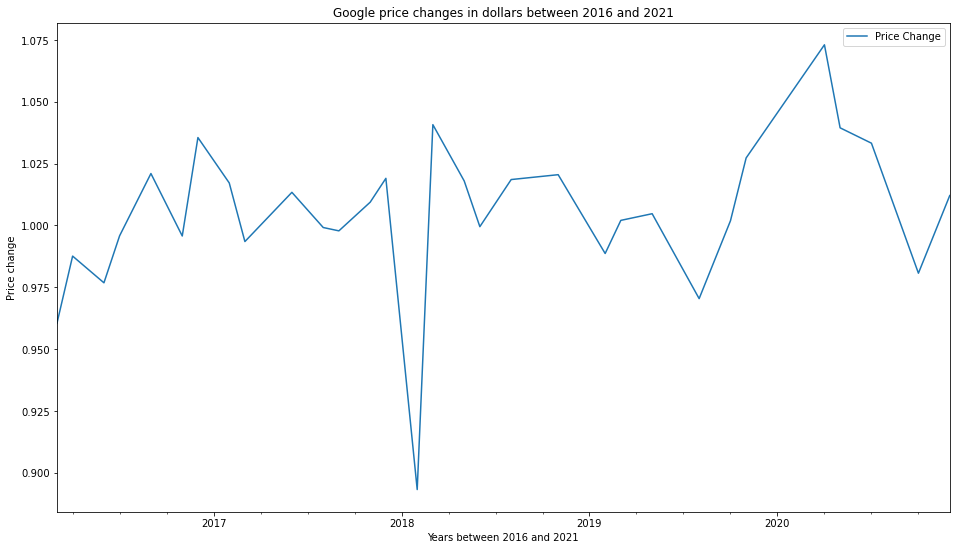

In [53]:
ax = price_change_df.plot(figsize=(16, 9), x = 'month_year', y = 'Price Change', title='Google price changes in dollars between 2016 and 2021')
ax.set_xlabel("Years between 2016 and 2021")
ax.set_ylabel("Price change")

In [54]:
Alphabet_stock['Close'].is_monotonic_increasing

False

In [55]:
price_change_df['Price Change'].is_monotonic_increasing

False

Create new column for t/f for < 1 or > 1 <br>
compute min, max, average for each window <br>
revenue, profit of the company <br>
download weka, select price change as target variables and do prediction based on the derived features <br>
Future directions: Getting larger dataset, Feature selection

In [56]:
# Derive the min, max, average 'close' for each month of alphabet stock
Alphabet_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Name,MA50,MA100,MA200
0,2016-01-04,762.200012,762.200012,747.539978,759.440002,759.440002,3369100.0,GOOGL,NaN,NaN,NaN
1,2016-01-05,764.099976,769.200012,755.650024,761.530029,761.530029,2260800.0,GOOGL,NaN,NaN,NaN
2,2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300.0,GOOGL,NaN,NaN,NaN
3,2016-01-07,746.489990,755.309998,735.280029,741.000000,741.000000,3156600.0,GOOGL,NaN,NaN,NaN
4,2016-01-08,747.799988,750.119995,728.919983,730.909973,730.909973,2375300.0,GOOGL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1290,2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300.0,GOOGL,1852.125195,1744.915896,1613.342650
1291,2021-02-19,2107.790039,2118.580078,2083.429932,2088.810059,2088.810059,1866100.0,GOOGL,1857.560796,1751.413396,1617.041600
1292,2021-02-22,2053.600098,2080.330078,2048.000000,2054.260010,2054.260010,1469500.0,GOOGL,1862.419397,1757.369396,1620.585750
1293,2021-02-23,2013.989990,2072.500000,1990.229980,2060.120117,2060.120117,1732200.0,GOOGL,1868.064600,1763.310397,1624.039951


In [57]:
xyz = Alphabet_stock[['Date', 'Close']]
# use a grouper function to find the monthly average
xyz['Date'] = pd.to_datetime(xyz['Date'])

<ipython-input-57-a277db39c987>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xyz['Date'] = pd.to_datetime(xyz['Date'])


In [58]:
xyz1 = xyz.groupby(pd.Grouper(key = 'Date', freq = '1M')).mean()
xyz1.reset_index(inplace=True)
xyz1['month_year'] = pd.to_datetime(xyz1['Date']).dt.to_period('M')
xyz1 = xyz1[['month_year', 'Close']]

In [59]:
xyz1

,month_year,Close
0,2016-01,736.656844
1,2016-02,724.389996
2,2016-03,746.787270
3,2016-04,756.608570
4,2016-05,726.529524
...,...,...
57,2020-10,1541.920898
58,2020-11,1743.390002
59,2020-12,1767.710904
60,2021-01,1800.195788


In [60]:
xyz2 = xyz.groupby(pd.Grouper(key = 'Date', freq = '1M')).min()
xyz2.reset_index(inplace=True)
xyz2['month_year'] = pd.to_datetime(xyz2['Date']).dt.to_period('M')
xyz2 = xyz2[['month_year', 'Close']]

In [61]:
xyz2

,month_year,Close
0,2016-01,710.489990
1,2016-02,701.020020
2,2016-03,712.799988
3,2016-04,705.059998
4,2016-05,708.440002
...,...,...
57,2020-10,1451.020020
58,2020-11,1624.319946
59,2020-12,1720.219971
60,2021-01,1722.880005


In [62]:
xyz3 = xyz.groupby(pd.Grouper(key = 'Date', freq = '1M')).max()
xyz3.reset_index(inplace=True)
xyz3['month_year'] = pd.to_datetime(xyz3['Date']).dt.to_period('M')
xyz3 = xyz3[['month_year', 'Close']]

In [63]:
xyz3

,month_year,Close
0,2016-01,761.530029
1,2016-02,780.909973
2,2016-03,768.340027
3,2016-04,787.679993
4,2016-05,748.849976
...,...,...
57,2020-10,1632.979980
58,2020-11,1787.020020
59,2020-12,1824.969971
60,2021-01,1907.949951


In [64]:
price_change_df_clean = price_change_df[['month_year', 'Close', 'High_Close', 'Price Change']]

In [65]:
price_change_df_clean

,month_year,Close,High_Close,Price Change
0,2016-03,742.169983,712.799988,0.960427
1,2016-04,769.669983,760.119995,0.987592
2,2016-06,748.460022,731.090027,0.976792
3,2016-07,710.250000,707.260010,0.995790
4,2016-09,791.400024,807.989990,1.020963
5,2016-11,805.479980,802.030029,0.995717
6,2016-12,764.330017,791.469971,1.035508
7,2017-02,815.239990,829.229980,1.017161
8,2017-03,856.750000,851.150024,0.993464
9,2017-06,988.289978,1001.500000,1.013367


In [66]:
merged_df_list = [xyz1, xyz2, xyz3]

In [67]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='month_year'), merged_df_list)

In [68]:
df_final.rename(columns={'Close_x': 'Average Close', 'Close_y': 'Minimum Close', 'Close': 'High Close'}, inplace=True)

In [69]:
df_final

,month_year,Average Close,Minimum Close,High Close
0,2016-01,736.656844,710.489990,761.530029
1,2016-02,724.389996,701.020020,780.909973
2,2016-03,746.787270,712.799988,768.340027
3,2016-04,756.608570,705.059998,787.679993
4,2016-05,726.529524,708.440002,748.849976
...,...,...,...,...
57,2020-10,1541.920898,1451.020020,1632.979980
58,2020-11,1743.390002,1624.319946,1787.020020
59,2020-12,1767.710904,1720.219971,1824.969971
60,2021-01,1800.195788,1722.880005,1907.949951


In [70]:
price_change_df_clean.rename(columns = {'High_Close': 'High Close'})

,month_year,Close,High Close,Price Change
0,2016-03,742.169983,712.799988,0.960427
1,2016-04,769.669983,760.119995,0.987592
2,2016-06,748.460022,731.090027,0.976792
3,2016-07,710.250000,707.260010,0.995790
4,2016-09,791.400024,807.989990,1.020963
5,2016-11,805.479980,802.030029,0.995717
6,2016-12,764.330017,791.469971,1.035508
7,2017-02,815.239990,829.229980,1.017161
8,2017-03,856.750000,851.150024,0.993464
9,2017-06,988.289978,1001.500000,1.013367


In [71]:
#close_price_filter = pd.merge(left = close_price_filter, right = close_price_filter1, on = ['index'])
price_change_df_clean = price_change_df_clean.merge(df_final, how = 'left', on = 'month_year')

In [72]:
price_change_df_clean.loc[price_change_df_clean['Price Change'] < 1, 'Price Change'] = 0
price_change_df_clean.loc[price_change_df_clean['Price Change'] > 1, 'Price Change'] = 1

In [73]:
price_change_df_clean1 = price_change_df_clean[['month_year', 'Close', 'Average Close', 'Minimum Close', 'High Close', 
                                         'Price Change']]

In [74]:
price_change_df_clean1

,month_year,Close,Average Close,Minimum Close,High Close,Price Change
0,2016-03,742.169983,746.787270,712.799988,768.340027,0.0
1,2016-04,769.669983,756.608570,705.059998,787.679993,0.0
2,2016-06,748.460022,719.585005,681.140015,748.460022,0.0
3,2016-07,710.250000,741.073505,704.890015,791.340027,0.0
4,2016-09,791.400024,801.621434,788.479980,815.950012,1.0
5,2016-11,805.479980,784.736180,753.219971,811.979980,0.0
6,2016-12,764.330017,800.624291,764.330017,817.890015,1.0
7,2017-02,815.239990,836.754735,815.239990,851.359985,1.0
8,2017-03,856.750000,853.790002,835.140015,872.369995,0.0
9,2017-06,988.289978,973.368638,929.679993,1004.280029,1.0


In [78]:
price_change_df_clean1['Price Change'] = price_change_df_clean1['Price Change'].astype(int) 

<ipython-input-78-0f43e808eeb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change_df_clean1['Price Change'] = price_change_df_clean1['Price Change'].astype(int)


In [80]:
price_change_df_clean1

,month_year,Close,Average Close,Minimum Close,High Close,Price Change
0,2016-03,742.169983,746.787270,712.799988,768.340027,0
1,2016-04,769.669983,756.608570,705.059998,787.679993,0
2,2016-06,748.460022,719.585005,681.140015,748.460022,0
3,2016-07,710.250000,741.073505,704.890015,791.340027,0
4,2016-09,791.400024,801.621434,788.479980,815.950012,1
5,2016-11,805.479980,784.736180,753.219971,811.979980,0
6,2016-12,764.330017,800.624291,764.330017,817.890015,1
7,2017-02,815.239990,836.754735,815.239990,851.359985,1
8,2017-03,856.750000,853.790002,835.140015,872.369995,0
9,2017-06,988.289978,973.368638,929.679993,1004.280029,1


In [81]:
#price_change_df_clean1.to_csv('Google_Price_Change_data')
#price_change_df_clean1.to_excel('Google_Price_Change_data2.xlsx')
price_change_df_clean1.to_csv('Google_Price_Change_data_binary1')